In [1]:
####################### DECISION TREES  ##########################

In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [3]:
# ABOUT the DATASET

# Imagine that you are a medical researcher compiling data for a study. You have collected data abt a set of patients, all of whom suffered from
# the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y.

# Part of your job is to build a modelto find out which drug might be appropriate for a future patient with the same illness. The feature sets 
# of this dataset are Age, Sex, Blood Pressure, and Cholesterol of patients, and the target is the drug that each patient responded to.

# It is a sample of binary classifier, and you can use the training part of the dataset to build a decision tree, and then use it to predict the class of a unknown 
# patient, ot to prescribe it to a new patient.


In [6]:
my_data = pd.read_csv("drug200.csv", delimiter=",")
my_data[0:5]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [7]:
######### Pre-Processing  ###########

In [8]:
# Using my_data as the Drug.csv data read by pandas, declare the following variables:

## -> X as the Feature Matrix (data of my_data)
## -> y as the response vector(target)

In [9]:
# Remove the column containing the target name since it doesn't contain numeric values.
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.113999999999999],
       [28, 'F', 'NORMAL', 'HIGH', 7.797999999999999],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [11]:
# As you may figure out, some features in the dataset are categorical such as Sex or BP. Unfortunately, Sklearn Decision Trees do not 
# handle categorical variables. But still we can convert these features to numerical values.pandas.get_dummies() Convert categorical variable into 
# dummy/indicator variables.

In [12]:
from sklearn import preprocessing

In [13]:
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F', 'M'])
X[:, 1] = le_sex.transform(X[:, 1])

In [14]:
le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:, 2] = le_BP.transform(X[:, 2])

In [15]:
le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:, 3] = le_Chol.transform(X[:, 3])

In [16]:
X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [17]:
# Now we can fill the target variable.
y = my_data["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

In [18]:
############## Setting Up the Decision Tree #############

# We willbe using train/test split on our decision tree. Let's import train_test_split from sklearn.cross_validation.

from sklearn.model_selection import train_test_split

In [20]:
# Now train_test_split will return 4 diff. parameters. We will name them:

## X_trainset, X_testset, y_trainset, y_testset

# The train_test_split will need the parameters:
## X,y,test_size =0.3, and random_state=3.

# The X and y are the arrays required before the split, the test_size represents the ratio of the testing dataset, and the random_state 
# ensures that we obtain the same splits.

In [21]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [24]:
print(X_trainset.shape)
print(y_trainset.shape)

(140, 5)
(140,)


In [25]:
print(X_testset.shape)
print(y_testset.shape)

(60, 5)
(60,)


In [26]:
######### MODELING ##############

# We will first create an instance of the DecisionTreeClassifier called drugTree.

## Inside of the classifier, specify criterion="entropy" so we can see the info. gain of each node.

In [27]:
drugTree = DecisionTreeClassifier(criterion = "entropy", max_depth = 4)
drugTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [28]:
# Next, we will fit the data with the training feature matrix X_trainset and training response vector y_trainset
drugTree.fit(X_trainset, y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [26]:
############### PREDICTION ################

In [30]:
# Let's make some predictions on the testing dataset and store it into a variable called predTree.
predTree = drugTree.predict(X_testset)

In [31]:
# you can print out predTree and y_testset if u want to visually compare the prediction to the actual values.
print(predTree[0:5])
print(y_testset[0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


In [32]:
################# Evaluation ################

# Next, let's import metrics from sklearn and check the accuracy of our model.

In [33]:
from sklearn import metrics
import matplotlib.pyplot as plt

In [34]:
print("DecisionTree's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTree's Accuracy:  0.9833333333333333


In [35]:
# Accuracy Classification score
 # computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.
    
# In multilabel classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly 
# match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

In [36]:
 ################## Visualization ################

In [38]:
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Anmol-Jaiswal\Anaconda3

  added / updated specs:
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    python-graphviz-0.14.1     |     pyh9f0ad1d_0          19 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          19 KB

The following NEW packages will be INSTALLED:

  python-graphviz    conda-forge/noarch::python-graphviz-0.14.1-pyh9f0ad1d_0




python-graphviz-0.14 | 19 KB     |            |   0% 
python-graphviz-0.14 | 19 KB     | ########4  |  85% 
python-graphviz-0.14 | 19 KB     | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transacti

In [42]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

In [43]:
dot_data = StringIO()
filename = "drugtree.png"

In [44]:
featureNames = my_data.columns[0:5]

In [45]:
targetNames = my_data["Drug"].unique().tolist()

In [46]:
out = tree.export_graphviz(drugTree, feature_names = featureNames, out_file=dot_data, class_names = np.unique(y_trainset), filled = True, special_characters=True, rotate=False)

In [47]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [48]:
graph.write_png(filename)

True

In [49]:
img = mpimg.imread(filename)

In [53]:
plt.figure(figsize = (100, 200))

<Figure size 7200x14400 with 0 Axes>

<Figure size 7200x14400 with 0 Axes>

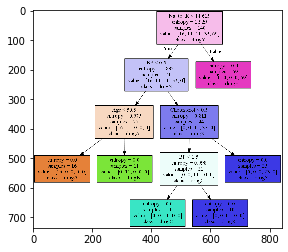

In [54]:
plt.imshow(img, interpolation='nearest')